# Ejercicio 1
Complete la tabla indicando cuántos atributos corresponden a cada del dataset de obesidad.

Continuas: 6 variables
Discretas: 2 variables
Nominales: 6 variables
Ordinales: 3 variables (incluyendo la variable objetivo)

Total: 17 variables en el dataset

# Ejercicio 2
Proponga una tarea de clasificación y una tarea de regresión que puedan realizarse a partir de los datos del
dataset de obesidad.

Se puede predecir la categoría de peso en base a todas las otras variables Nobesity.

# Ejercicio 3
Indique qué tipo de información brindan las siguientes representaciones gráficas:
a) Diagrama de Barras
b) Histograma
c) Diagrama de caja
d) Diagrama de dispersión
Luego, genere al menos un ejemplo de cada representación usando el dataset de obesidad y explique
cómo interpretar cada uno.

<Axes: xlabel='Gender', ylabel='count'>

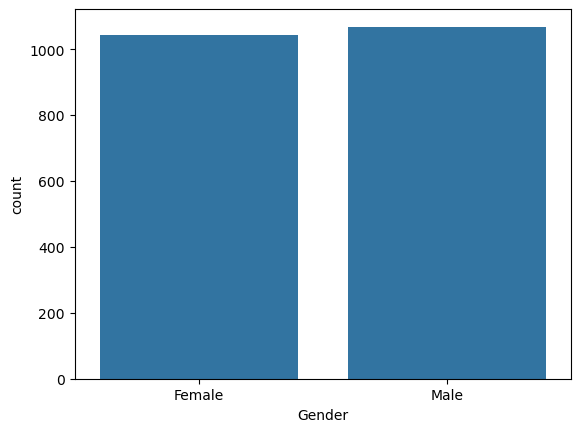

In [23]:
import pandas as pd 
import seaborn as sns

df = pd.read_csv('csv/obesity_uci.csv')
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Weight', ylabel='Count'>

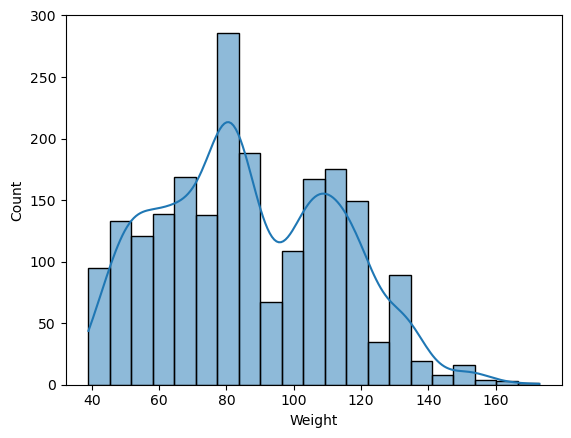

In [24]:
sns.histplot(data=df, x='Weight', kde=True)

<Axes: xlabel='Gender', ylabel='Weight'>

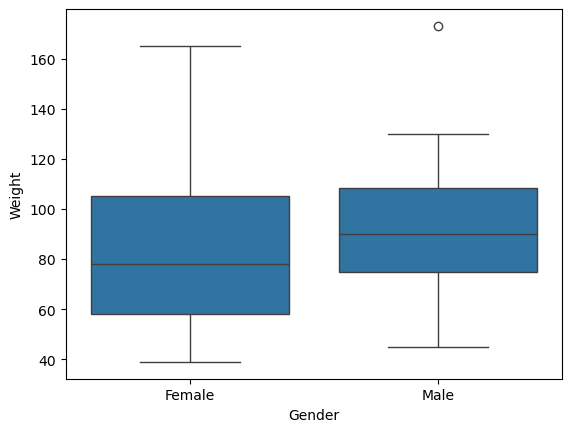

In [25]:
sns.boxplot(x='Gender', y='Weight', data=df)

Este gráfico es un **boxplot (diagrama de caja)** que compara la distribución del **peso (Weight)** entre dos grupos: **Female** y **Male**.
### Partes del boxplot:

1. **Caja (rectángulo azul)**:

   * Representa el rango intercuartílico (IQR), es decir, los valores entre el cuartil 1 (Q1, 25%) y el cuartil 3 (Q3, 75%).
   * Dentro de la caja está la **línea negra horizontal**, que es la **mediana (Q2, 50%)**.

2. **Bigotes (líneas que salen de la caja)**:

   * Muestran los valores que están dentro de un rango considerado "normal" (1.5 veces el IQR desde Q1 y Q3).
   * Más allá de los bigotes se consideran **outliers** (valores atípicos).

3. **Círculos**:

   * Son los **outliers** (valores extremos).

---

### Interpretación del gráfico:

* **Female**:

  * Mediana ≈ 78.
  * El peso está más disperso (caja más ancha).
  * Hay mujeres con peso desde \~40 hasta \~165, aunque la mayoría se concentra entre \~58 y \~105.
  * No se observan outliers claros en este grupo.

* **Male**:

  * Mediana ≈ 90 (más alta que en Female).
  * Distribución más concentrada (caja más estrecha).
  * Rango general de \~45 a \~130, pero aparece un **outlier** arriba de 170.
  * Esto indica que un hombre tiene un peso mucho mayor que el resto.

---

### Comparación:

* **Los hombres, en general, pesan más que las mujeres** (la mediana es más alta).
* **Las mujeres tienen una mayor dispersión en los pesos** (valores más variados).
* **Los hombres presentan al menos un caso atípico extremo**, mientras que en mujeres no.

<Axes: xlabel='Height', ylabel='Weight'>

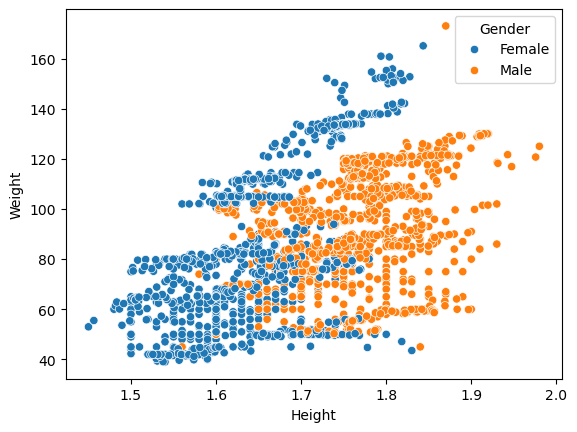

In [26]:
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df)

# Ejercicio 4
Complete el siguiente cuadro y dibuje el diagrama de caja del atributo “weight”

In [27]:
import math
col = df['Weight']
upper_whisker = col.quantile(0.75) + 1.5 * (col.quantile(0.75) - col.quantile(0.25))
lower_whisker = col.quantile(0.25) - 1.5 * (col.quantile(0.75) - col.quantile(0.25))

max_whisker = col[col <= upper_whisker].max()
min_whisker = col[col >= lower_whisker].min()

print("max: " + str(col.max()))
print("min: " + str(col.min()))
print("q1: " + str(col.quantile(0.25)))
print("q2: " + str(col.quantile(0.50)))
print("q3: " + str(col.quantile(0.75)))
print("RIC: " + str(col.quantile(0.75) - col.quantile(0.25)))
print("Upper Whisker: " + str(max_whisker))
print("Lower Whisker: " + str(min_whisker))

iqr = col.quantile(0.75) - col.quantile(0.25)
lower_left = col.quantile(0.25) - 1.5 * iqr
upper_left = col.quantile(0.25) - 3 * iqr
upper_right = col.quantile(0.75) + 3 * iqr
lower_right = col.quantile(0.75) + 1.5 * iqr
print("Rango de valores atípicos leves: [{:.2f}, {:.2f}]".format(upper_left, lower_left))
print("Rango de valores atípicos severos: [{:.2f}, {:.2f}]".format(lower_right, upper_right))


max: 173.0
min: 39.0
q1: 65.473343
q2: 83.0
q3: 107.430682
RIC: 41.957339000000005
Upper Whisker: 165.057269
Lower Whisker: 39.0
Rango de valores atípicos leves: [-60.40, 2.54]
Rango de valores atípicos severos: [170.37, 233.30]


# Ejercicio 5

Los valores del atributo peso (“weight”) fueron agrupados según el atributo de antecedente de obesidad
familiar (“family_history_with_overweight”). La figura muestra los diagramas de caja correspondientes. 

Complete el siguiente cuadro y responda verdadero o falso justificando cada afirmación según los valores
obtenidos:


a) Al menos el 25% de las personas con antecedentes familiares de obesidad pesan más de 100 kg.

Verdad, los pesos del ultimo cuartil pesan mas de 111kg.


b) Es atípico que una persona sin antecedentes familiares de obesidad (no) pese más de 115 kg.

Falso, lo atipico es que pese mas de 100kg o menos de 18.

c) La mediana del peso de las personas sin antecedentes familiares (no) es menor que 60 kg.

Falso, si es menor, por 1 kg.

d) Todos los valores atípicos para personas con antecedentes familiares de obesidad son leves.  

Si

In [28]:
x = df.groupby("family_history_with_overweight")["Weight"]
x.describe()

,count,mean,std,min,25%,50%,75%,max
family_history_with_overweight,,,,,,,,
no,385.0,59.041141,14.181545,39.101805,49.039794,56.000000,69.500000,115.0
yes,1726.0,92.730202,24.232190,39.000000,75.851219,89.986675,111.839011,173.0


In [29]:
for name, group in df.groupby("family_history_with_overweight")["Weight"]:
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    print(f"{name}: IQR={iqr}, Lower={lower_whisker}, Upper={upper_whisker}")
    lower_left = col.quantile(0.25) - 1.5 * iqr
    upper_left = col.quantile(0.25) - 3 * iqr
    upper_right = col.quantile(0.75) + 3 * iqr
    lower_right = col.quantile(0.75) + 1.5 * iqr
    print("Rango de valores atípicos leves: [{:.2f}, {:.2f}]".format(upper_left, lower_left))
    print("Rango de valores atípicos severos: [{:.2f}, {:.2f}]".format(lower_right, upper_right))
    print(group.max())  

no: IQR=20.460206, Lower=18.349485, Upper=100.190309
Rango de valores atípicos leves: [4.09, 34.78]
Rango de valores atípicos severos: [138.12, 168.81]
115.0
yes: IQR=35.9877915, Lower=21.86953175, Upper=165.82069775
Rango de valores atípicos leves: [-42.49, 11.49]
Rango de valores atípicos severos: [161.41, 215.39]
173.0


# Ejercicio 6
Discretice el atributo del consumo de agua diario en litros (“CH2O”) en tres intervalos: Bajo, Medio y Alto.
Indique en la tabla los intervalos utilizados y la cantidad respectivas de ejemplos de cada uno al discretizar
por rango y por intervalo. Luego, explique porque los ejemplos no quedaron divididos en intervalos con la
misma cantidad de valores.

In [30]:
df["CH2O_rango"] = pd.cut(df["CH2O"],
                          bins=3,              
                          labels=[           
                              "Bajo",
                              "Medio",
                              "Alto"
                          ]
                         )


# Ejercicio 7
Realice las siguientes tareas para preparar el dataset para que pueda ser utilizado para entrenar modelos de
redes neuronales.
a) Visualice las primeras 5 filas y el resumen estadístico.

b) Identifique los atributos (columnas) con valores nulos y su porcentaje.

c) Analizar los valores faltantes y discutir cuales serían las alternativas posibles para tratarlos.

d) Los nombres de los pasajeros van acompañados de títulos que pueden ser importantes para la
interpretación de los datos o para completar información faltante:

i. Extrae el título (como Mr, Miss, Mrs, Master, etc.) del nombre de cada pasajero y crea una nueva
columna llamada Title.

ii. Unifica los valores para que queden Mr, Miss (Mlle, Ms), Mrs (Mme), Master, Others (resto).

iii. Computa las edades faltantes utilizando la edad promedio por categoría.

e) Complete los valores faltantes utilizando las estrategias planteadas en los puntos anteriores.

f) Cree un nuevo atributo FamilySize que contabiliza los integrantes de familia a partir de los atributos
SibSp (hermanos y esposo) y Parch (padres e hijos). No olvidar contar a la persona.

g) Numerice los atributos categóricos: Sex, Embarked, y Title.

h) Discuta y responda ¿Por qué one-hot encoding podría ser preferible a label encoding para el atributo
Pclass?

i) Visualiza distribuciones: Histograma de Age, gráfico de barras para Survived por Sex y Pclass.

In [31]:
titanic = pd.read_csv("csv/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
titanic[titanic["Age"].isna()].shape[0]

177

In [34]:
titanic[titanic["Cabin"].isna()].shape[0]

687

In [35]:
import pandas as pd
import re
import numpy as np


def extraer_titulo(nombre):
    match = re.search(r',\s*(\w+)\.', nombre)
    if match:
        titulo = match.group(1)
        titulo = titulo.lower()
        if titulo in ["miss", "mlle", "ms", "lady"]:
            return "Miss"
        elif titulo in ["mrs", "mme"]:
            return "Mrs"
        elif titulo == "mr":
            return "Mr"
        elif titulo == "master":
            return "Master"
        else:
            return "Others"
    return "Others"

titanic["Title"] = titanic["Name"].apply(extraer_titulo)

edad_promedio_por_titulo = titanic.groupby("Title")["Age"].mean()

def completar_edad(row):
    if pd.isna(row["Age"]):
        return edad_promedio_por_titulo[row["Title"]]
    else:
        return row["Age"]

titanic["Age"] = titanic.apply(completar_edad, axis=1)

print(titanic[["Name", "Title", "Age"]].head())


                                                Name Title   Age
0                            Braund, Mr. Owen Harris    Mr  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs  38.0
2                             Heikkinen, Miss. Laina  Miss  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs  35.0
4                           Allen, Mr. William Henry    Mr  35.0


In [36]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

In [37]:
titanic["Sex"] = titanic["Sex"].replace({"female": 0, "male": 1})

titanic["Embarked"] = titanic["Embarked"].replace({"C": 0, "Q": 1, "S": 2})

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Others": 4}
titanic["Title"] = titanic["Title"].replace(title_mapping)


titanic.head()

/tmp/ipykernel_37487/4218628006.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["Sex"] = titanic["Sex"].replace({"female": 0, "male": 1})
/tmp/ipykernel_37487/4218628006.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["Embarked"] = titanic["Embarked"].replace({"C": 0, "Q": 1, "S": 2})
/tmp/ipykernel_37487/4218628006.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To o

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0,0,1


Para Pclass, one-hot encoding es preferible si no queremos que el modelo interprete un orden lineal entre clases, especialmente en algoritmos sensibles a la escala o a las relaciones numéricas entre categorías.

<Axes: xlabel='Age', ylabel='Count'>

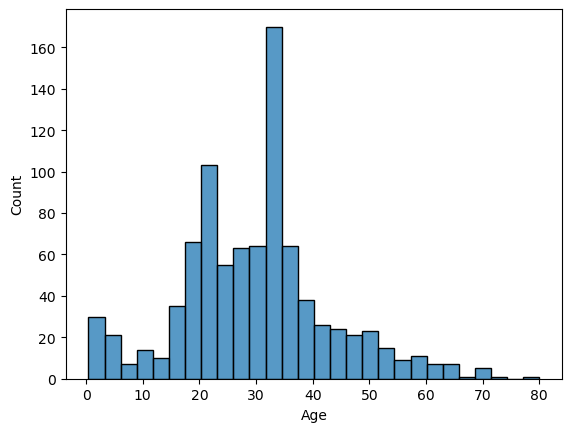

In [38]:
sns.histplot(data=titanic['Age'])

<Axes: xlabel='Sex', ylabel='count'>

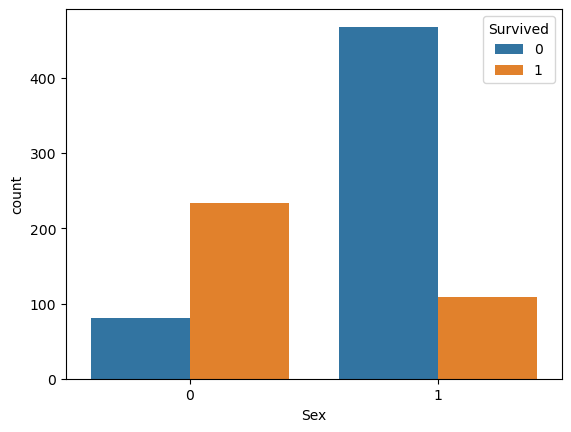

In [39]:
conteos = titanic.groupby(['Sex', 'Survived']).size().reset_index(name='count')

sns.barplot(x='Sex', y='count', hue='Survived', data=conteos)

<Axes: xlabel='Pclass', ylabel='count'>

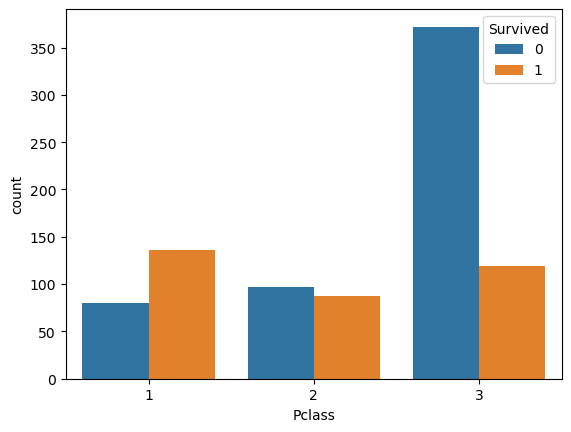

In [40]:
conteos_pclass = titanic.groupby(['Pclass', 'Survived']).size().reset_index(name='count')

sns.barplot(x='Pclass', y='count', hue='Survived', data=conteos_pclass)

# Ejercicio 8
Calcule la correlación lineal entre los atributos “Fare” (Tarifa) y “PClass” (clase del ticket). Indique la
intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa). Explique el
significado del valor de correlación obtenido.

In [41]:
corr = titanic['Fare'].corr(titanic['Pclass'])
print(corr)

-0.5494996199439078


Es unc correlacion lineal debil. [0,5 a 0.8)
Negativa → una aumenta mientras la otra disminuye.

# Ejercicio 9
Realice un análisis sobre los valores de los atributos del dataset automobile.csv. Para cada atributo que no
pueda ser procesado directamente, indique que problema tiene (valores nulos o vacíos, valores categóricos,
valores atípicos o outliers, etc.) y como solucionarlo.

El problema es que hay nulos, "?", en ciertas columnas, normalmente para toda una categoria de auto faltan datos, es decir para todos los alfa-romeo faltan las normalized losses. 

Como solucion podemos agrupar por categorias que si tengamos datos y rellenar los na con la mediana de la categoria.

NO podemos hacerlo agrupando por modelo por ejemplo.

In [ ]:
import pandas as pd
df = pd.read_csv("csv/automobile.csv")

df = df.replace("?", pd.NA)

id_vars = [
    "make"
]

numeric_vars = ["wheel-base", "normalized-losses", "price"]
df[numeric_vars] = df[numeric_vars].apply(pd.to_numeric, errors="coerce")

# Intento rellenar con el promedio de las marcas, pero esto no existe normalmente
df[numeric_vars] = df.groupby(id_vars)[numeric_vars].transform(
    lambda x: x.fillna(x.mean())
)
# Relleno con el promedio literal de la columna
df["wheel-base"].fillna(df["wheel-base"].mean(), inplace=True)
df["normalized-losses"].fillna(df["normalized-losses"].mean(), inplace=True)

df["engine-location"] = (
    df.groupby(id_vars)["engine-location"]
      .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "front"))
)

print(df[["make", "body-style", "engine-location", "wheel-base", "normalized-losses", "price"]].head(30))


           make   body-style engine-location  wheel-base  normalized-losses  \
0   alfa-romero  convertible           front        88.6         126.400805   
1   alfa-romero  convertible           front        88.6         126.400805   
2   alfa-romero    hatchback           front        94.5         126.400805   
3          audi        sedan           front        99.8         164.000000   
4          audi        sedan           front        99.4         164.000000   
5          audi        sedan           front        99.8         161.000000   
6          audi        sedan           front       105.8         158.000000   
7          audi        wagon           front       105.8         161.000000   
8          audi        sedan           front       105.8         158.000000   
9          audi    hatchback           front        99.5         161.000000   
10          bmw        sedan           front       101.2         192.000000   
11          bmw        sedan           front       1

/tmp/ipykernel_37487/2925848605.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["wheel-base"].fillna(df["wheel-base"].mean(), inplace=True)
/tmp/ipykernel_37487/2925848605.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

# Ejercicio 10
Dada la siguiente tabla con mediciones de 2 características correspondientes a mediciones de altura y peso
de personas:

<Axes: >

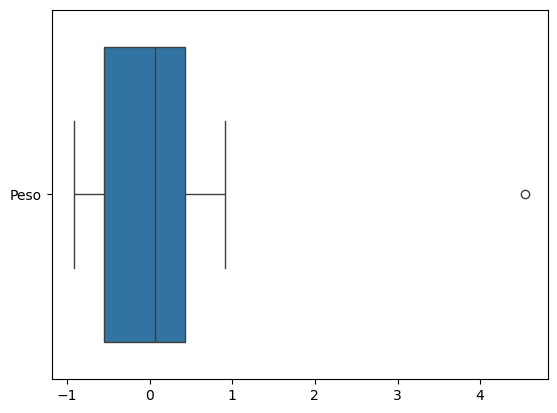

In [59]:
alturas = [1.65, 1.81, 1.70, 1.62, 1.74, 1.70, 1.80, 1.73, 1.68]
pesos   = [75, 86, 82, 78, 77, 87, 90, 83, 80]
# LA PARTE DE AGREGAR, termina pasando que la caja queda re chata mal
alturas.append(2.20)
pesos.append(120)
# Crear DataFrame
df = pd.DataFrame({
    "Altura": alturas,
    "Peso": pesos
})
#df_norm = (df - df.min()) / (df.max() - df.min())
# df_std = (df - df.mean()) / df.std()
df_robust = (df - df.median()) / (df.quantile(0.75) - df.quantile(0.25))

sns.boxplot(data=df_robust.groupby("Altura").mean(), orient="h")